Reading the data from a csv

In [156]:
data <-read.csv("D:/MS_Spring2017/DIC/Lab3/Data/NHLTop100.csv")

Displaying the data and noting the column variables

In [157]:
head(data)

Rank,Player,Team,Pos,X1st.NHL.Season,Last.NHL.Season,GP,G,A,P,X...,PIM,PP,SH,GW,GT,OT,Shots
1,Wayne Gretzky,,C,1979-1980,1998-1999,1487,894,1963,2857,518,577,204,73,91,12,1,5089
2,Mark Messier,,C,1979-1980,2003-2004,1756,694,1193,1887,210,1910,179,63,92,15,7,4219
3,Gordie Howe,,R,1946-1947,1979-1980,1767,801,1049,1850,87,1685,39,5,18,NA,NA,NA
4,Ron Francis,,C,1981-1982,2003-2004,1731,549,1249,1798,-10,979,188,12,79,13,3,3754
5,Marcel Dionne,,C,1971-1972,1988-1989,1348,731,1040,1771,28,600,234,19,74,1,2,5366
6,Steve Yzerman,,C,1983-1984,2005-2006,1514,692,1063,1755,202,924,202,50,94,12,8,4602


In [67]:
colnames(data)

[1] "Rank"            "Player"          "Team"            "Pos"            
 [5] "X1st.NHL.Season" "Last.NHL.Season" "GP"              "G"              
 [9] "A"               "P"               "X..."            "PIM"            
[13] "PP"              "SH"              "GW"              "GT"             
[17] "OT"              "Shots"

------------Initial Linear Model--------------

In [158]:
model <- lm(data$A ~ data$G)

In [91]:
summary(model)


Call:
lm(formula = data$A ~ data$G)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.5135    74.6410   6.625 1.88e-09 ***
data$G        0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


Noting R2 and p values from the model

In [103]:
install.packages("broom",repos="http://cran.us.r-project.org/")

package 'broom' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nitik\AppData\Local\Temp\Rtmp8W45cI\downloaded_packages


In [104]:
library(broom)

Warning message:
"package 'broom' was built under R version 3.3.3"

In [111]:
glance(model)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.1082305,0.09913082,207.0436,11.89387,0.0008317169,2,-674.1767,1354.353,1362.169,4200973,98


In [146]:
summary_table <- data.frame(Model= character(), R_sqaured= integer(0), p_Value = integer(0), stringsAsFactors=FALSE)

In [147]:
summary_table[1,] <- c("LinearModel",glance(model)$r.squared,glance(model)$p.value)

In [148]:
head(summary_table)

Model,R_sqaured,p_Value
LinearModel,0.10823050447434,0.000831716923854345


plot(model)

Plotting the model

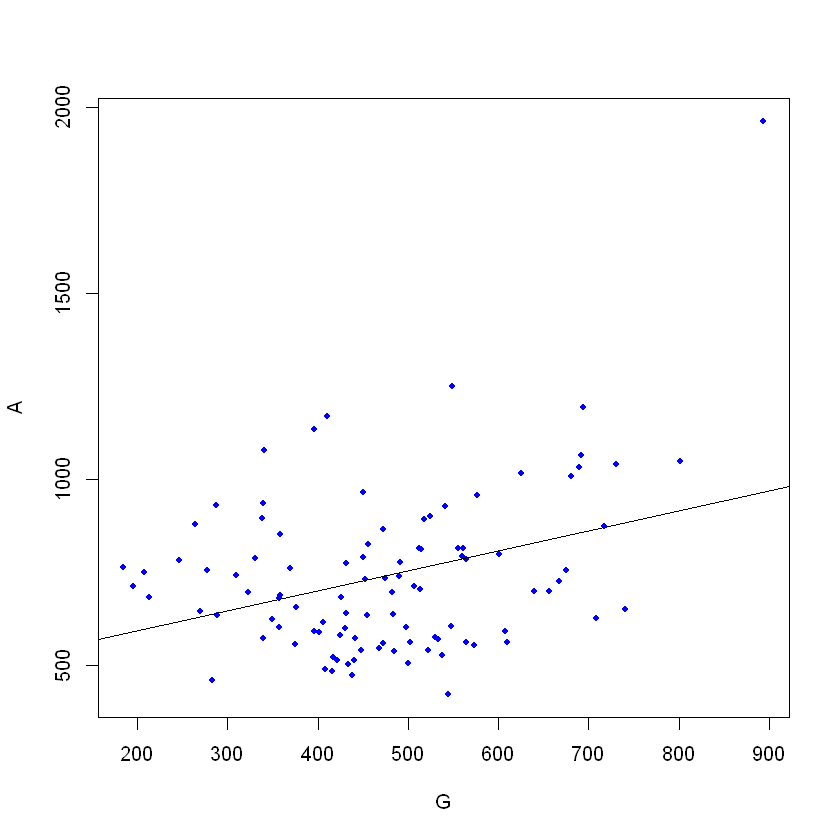

In [53]:
plot(data$G, data$A, pch=20,col="blue", xlab="G",ylab="A")
abline(model)

--------Linear Model: Wayne Gretzky--------

Passing the line through point (894,1963)

Quering the data to note Wayne Gretzky G and A values

In [54]:
library(sqldf) 
sqldf("Select * from data where Player='Wayne Gretzky'")

Rank,Player,Team,Pos,X1st.NHL.Season,Last.NHL.Season,GP,G,A,P,...,PP,SH,GW,GT,OT,Shots,G_wayne,A_wayne,G_Patrick,A_Patrick
1,Wayne Gretzky,,C,1979-1980,1998-1999,1487,894,1963,2857,...,204,73,91,12,1,5089,0,0,611,1503


G and A values for Wayne Gretzky: G=894 and  A=1963

In [8]:
G_wayne <- sqldf("select G from data")

Moving the line by subtracting the intercept for G and A values of Wayne Gretzky

Adding new column variables to data with updated G and A values for the new line

In [162]:
G_wayne <- data.frame(G_wayne-894)

In [163]:
data["G_wayne"] <- G_wayne

In [164]:
A_wayne <- sqldf("select A from data")

In [165]:
A_wayne <- data.frame(A_wayne-1963)

In [166]:
data["A_wayne"] <- A_wayne

Updated data frame with A_Wayne and G_Wayne

In [14]:
head(data)

Rank,Player,Team,Pos,X1st.NHL.Season,Last.NHL.Season,GP,G,A,P,X...,PIM,PP,SH,GW,GT,OT,Shots,G_wayne,A_wayne
1,Wayne Gretzky,,C,1979-1980,1998-1999,1487,894,1963,2857,518,577,204,73,91,12,1,5089,0,0
2,Mark Messier,,C,1979-1980,2003-2004,1756,694,1193,1887,210,1910,179,63,92,15,7,4219,-200,-770
3,Gordie Howe,,R,1946-1947,1979-1980,1767,801,1049,1850,87,1685,39,5,18,NA,NA,NA,-93,-914
4,Ron Francis,,C,1981-1982,2003-2004,1731,549,1249,1798,-10,979,188,12,79,13,3,3754,-345,-714
5,Marcel Dionne,,C,1971-1972,1988-1989,1348,731,1040,1771,28,600,234,19,74,1,2,5366,-163,-923
6,Steve Yzerman,,C,1983-1984,2005-2006,1514,692,1063,1755,202,924,202,50,94,12,8,4602,-202,-900


In [167]:
model_wayne <- lm(A_wayne ~ G_wayne,data)

In [168]:
coefs <- coef(model_wayne)

In [173]:
coefs[1]

(Intercept) 
  -538.3576

Plotting the model for Wayne Gretzky

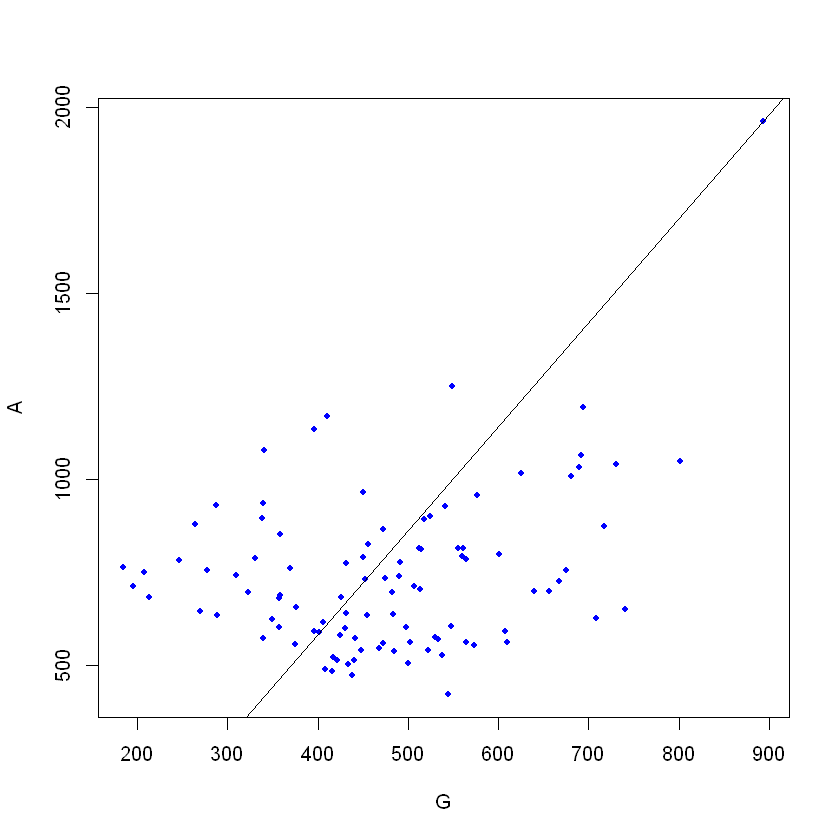

In [175]:
plot(data$G, data$A, pch=20,col="blue", xlab="G",ylab="A")
abline(coefs[1],(1963-coefs[1])/894)

Noting r2 and p values for wayne gretzky model

In [186]:
summary_table[2,] <- c("Wayne Gretzky Model",glance(model_wayne)$r.squared,glance(model_wayne)$p.value)
head(summary_table)

Model,R_sqaured,p_Value
LinearModel,0.10823050447434,0.000831716923854345
Wayne Gretzky Model,0.10823050447434,0.000831716923854359
Patrick Kane Model,0.579980304611218,1.51216360348177e-20
Origin Model,0.89818610880756,6.49089821934292e-51


Plotting the model for Wayne Gretzky that  passes through the origin

In [182]:
model_wayne_origin <- lm(A_wayne ~ G_wayne+0,data)

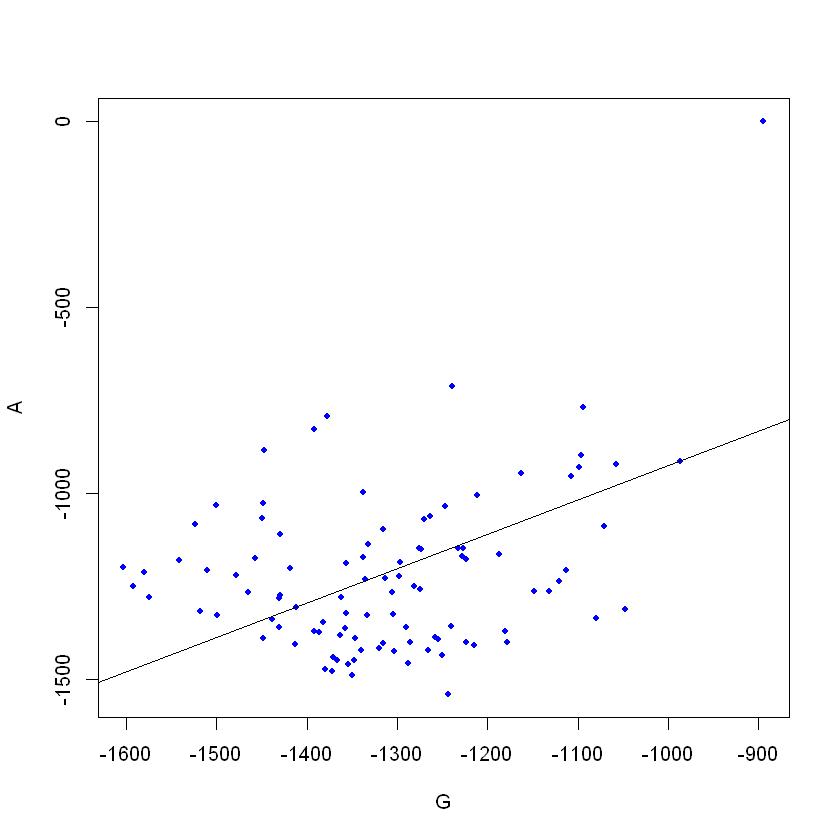

In [183]:
plot(data$G_wayne, data$A_wayne, pch=20,col="blue", xlab="G",ylab="A")
abline(model_wayne_origin)

Noting r2 and p values for wayne gretzky model origin

In [187]:
summary_table[3,] <- c("Wayne Gretzky Model Origin",glance(model_wayne_origin)$r.squared,glance(model_wayne_origin)$p.value)
head(summary_table)

Model,R_sqaured,p_Value
LinearModel,0.10823050447434,0.000831716923854345
Wayne Gretzky Model,0.10823050447434,0.000831716923854359
Wayne Gretzky Model Origin,0.970653958204801,1.12996626811667e-77
Origin Model,0.89818610880756,6.49089821934292e-51


---------------Patrick Kane Model------------------

Adding Patrick Kane gathered data to the data frame

Checking the types of the column variables

In [15]:
sapply(data, class)

Rank          Player            Team             Pos X1st.NHL.Season 
      "integer"        "factor"        "factor"        "factor"        "factor" 
Last.NHL.Season              GP               G               A               P 
       "factor"       "integer"       "integer"       "integer"       "integer" 
           X...             PIM              PP              SH              GW 
      "integer"       "integer"       "integer"       "integer"       "integer" 
             GT              OT           Shots         G_wayne         A_wayne 
      "integer"       "integer"       "integer"       "numeric"       "numeric"

In [16]:
colnames(data)

[1] "Rank"            "Player"          "Team"            "Pos"            
 [5] "X1st.NHL.Season" "Last.NHL.Season" "GP"              "G"              
 [9] "A"               "P"               "X..."            "PIM"            
[13] "PP"              "SH"              "GW"              "GT"             
[17] "OT"              "Shots"           "G_wayne"         "A_wayne"

Adding one new row with Patrick Kane data

In [17]:
df<-data.frame(101,"Patrick Kane","C","","1995-1996","2007-2008",731,283,460,743,0,282,85,0,49,0,0,2280,-611,-1917)
names(df)<-c("Rank","Player","Team","Pos","X1st.NHL.Season","Last.NHL.Season",
             "GP","G","A","P","X...","PIM","PP","SH","GW","GT","OT","Shots","G_wayne","A_wayne")

In [18]:
data <- rbind(df, data)

In [19]:
data

Rank,Player,Team,Pos,X1st.NHL.Season,Last.NHL.Season,GP,G,A,P,X...,PIM,PP,SH,GW,GT,OT,Shots,G_wayne,A_wayne
101,Patrick Kane,C,,1995-1996,2007-2008,731,283,460,743,0,282,85,0,49,0,0,2280,-611,-1917
1,Wayne Gretzky,,C,1979-1980,1998-1999,1487,894,1963,2857,518,577,204,73,91,12,1,5089,0,0
2,Mark Messier,,C,1979-1980,2003-2004,1756,694,1193,1887,210,1910,179,63,92,15,7,4219,-200,-770
3,Gordie Howe,,R,1946-1947,1979-1980,1767,801,1049,1850,87,1685,39,5,18,NA,NA,NA,-93,-914
4,Ron Francis,,C,1981-1982,2003-2004,1731,549,1249,1798,-10,979,188,12,79,13,3,3754,-345,-714
5,Marcel Dionne,,C,1971-1972,1988-1989,1348,731,1040,1771,28,600,234,19,74,1,2,5366,-163,-923
6,Steve Yzerman,,C,1983-1984,2005-2006,1514,692,1063,1755,202,924,202,50,94,12,8,4602,-202,-900
7,Mario Lemieux,,C,1984-1985,2005-2006,915,690,1033,1723,115,834,236,49,74,7,7,3633,-204,-930
8,Jaromir Jagr,NJD,R,1990-1991,2012-2013,1391,681,1007,1688,278,959,195,11,118,11,17,4881,-213,-956
9,Joe Sakic,,C,1988-1989,2008-2009,1378,625,1016,1641,30,614,205,32,86,13,7,4621,-269,-947


Updating the G and A values and adding two new columns with updated G and A values for the line to pass through Patrick Kane data

In [21]:
library(sqldf)
sqldf("Select * from data where Player='Patrick Kane'")

Rank,Player,Team,Pos,X1st.NHL.Season,Last.NHL.Season,GP,G,A,P,X...,PIM,PP,SH,GW,GT,OT,Shots,G_wayne,A_wayne
101,Patrick Kane,C,,1995-1996,2007-2008,731,283,460,743,0,282,85,0,49,0,0,2280,-611,-1917


In [178]:
G_Patrick <- sqldf("select G from data")
G_Patrick <- data.frame(G_Patrick-283)
data["G_Patrick"] <- G_Patrick
A_Patrick <- sqldf("select A from data")
A_Patrick <- data.frame(A_Patrick-460)
data["A_Patrick"] <- A_Patrick

In [28]:
data

Rank,Player,Team,Pos,X1st.NHL.Season,Last.NHL.Season,GP,G,A,P,...,PP,SH,GW,GT,OT,Shots,G_wayne,A_wayne,G_Patrick,A_Patrick
101,Patrick Kane,C,,1995-1996,2007-2008,731,283,460,743,...,85,0,49,0,0,2280,-611,-1917,0,0
1,Wayne Gretzky,,C,1979-1980,1998-1999,1487,894,1963,2857,...,204,73,91,12,1,5089,0,0,611,1503
2,Mark Messier,,C,1979-1980,2003-2004,1756,694,1193,1887,...,179,63,92,15,7,4219,-200,-770,411,733
3,Gordie Howe,,R,1946-1947,1979-1980,1767,801,1049,1850,...,39,5,18,NA,NA,NA,-93,-914,518,589
4,Ron Francis,,C,1981-1982,2003-2004,1731,549,1249,1798,...,188,12,79,13,3,3754,-345,-714,266,789
5,Marcel Dionne,,C,1971-1972,1988-1989,1348,731,1040,1771,...,234,19,74,1,2,5366,-163,-923,448,580
6,Steve Yzerman,,C,1983-1984,2005-2006,1514,692,1063,1755,...,202,50,94,12,8,4602,-202,-900,409,603
7,Mario Lemieux,,C,1984-1985,2005-2006,915,690,1033,1723,...,236,49,74,7,7,3633,-204,-930,407,573
8,Jaromir Jagr,NJD,R,1990-1991,2012-2013,1391,681,1007,1688,...,195,11,118,11,17,4881,-213,-956,398,547
9,Joe Sakic,,C,1988-1989,2008-2009,1378,625,1016,1641,...,205,32,86,13,7,4621,-269,-947,342,556


Plotting the patrick kane Model

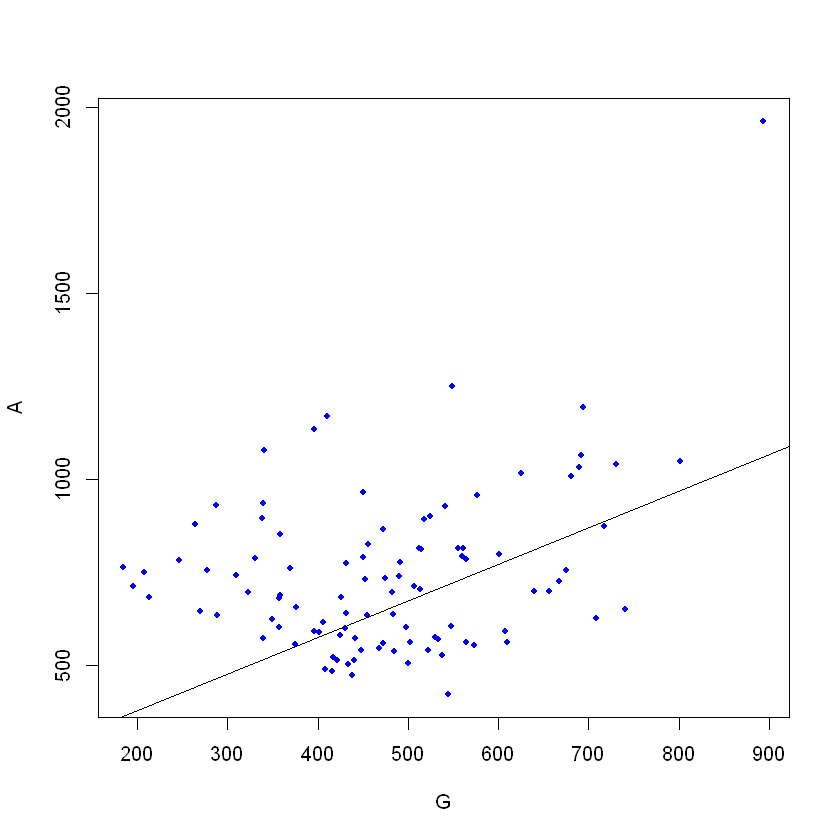

In [179]:
model_patrick <- lm(A_Patrick ~ G_Patrick,data)
coefs <- coef(model_patrick)
plot(data$G, data$A, pch=20,col="blue", xlab="G",ylab="A")
abline(coefs[1],(460-coefs[1])/283)


Noting r2 and p values for Patrick Kane model

In [188]:
summary_table[4,] <- c("Patrick Kane Model",glance(model_patrick)$r.squared,glance(model_patrick)$p.value)
head(summary_table)

Model,R_sqaured,p_Value
LinearModel,0.10823050447434,0.000831716923854345
Wayne Gretzky Model,0.10823050447434,0.000831716923854359
Wayne Gretzky Model Origin,0.970653958204801,1.12996626811667e-77
Patrick Kane Model,0.10823050447434,0.000831716923854363


Plotting the patrick kane Model through origin

In [180]:
model_patrick_origin <- lm(A_Patrick ~ G_Patrick+0,data)

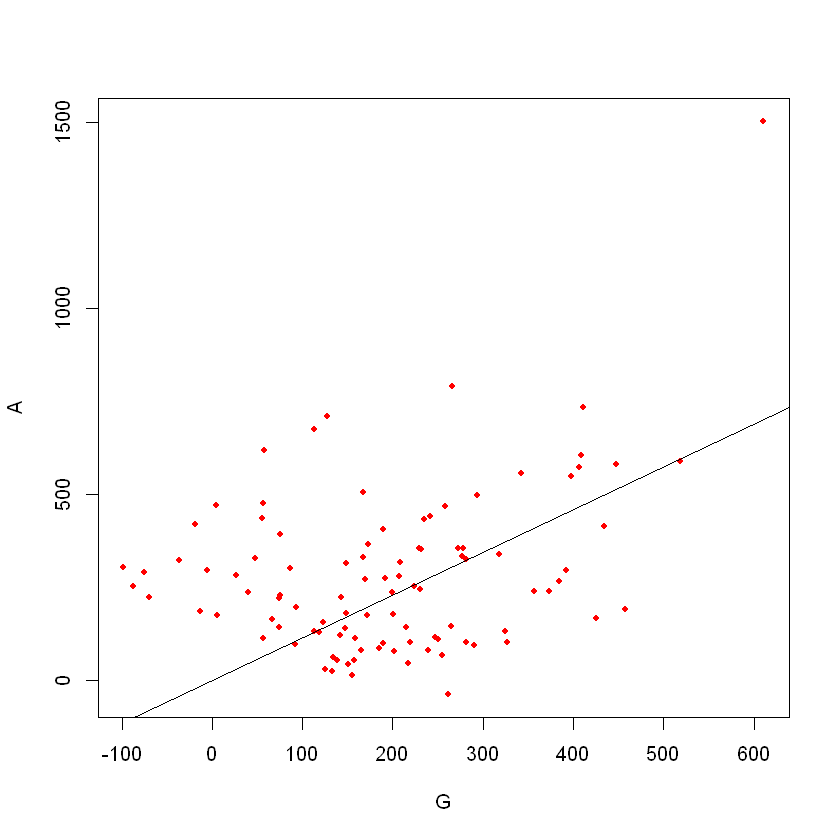

In [181]:
plot(data$G_Patrick, data$A_Patrick, pch=20,col="red", xlab="G",ylab="A")
abline(model_patrick_origin)

Noting r2 and p values for Patrick Kane model origin

In [189]:
summary_table[5,] <- c("Patrick Kane Model Origin",glance(model_patrick_origin)$r.squared,glance(model_patrick_origin)$p.value)
head(summary_table)

Model,R_sqaured,p_Value
LinearModel,0.10823050447434,0.000831716923854345
Wayne Gretzky Model,0.10823050447434,0.000831716923854359
Wayne Gretzky Model Origin,0.970653958204801,1.12996626811667e-77
Patrick Kane Model,0.10823050447434,0.000831716923854363
Patrick Kane Model Origin,0.579980304611218,2.34480030357911e-20


-----------Model passing through origin--------------

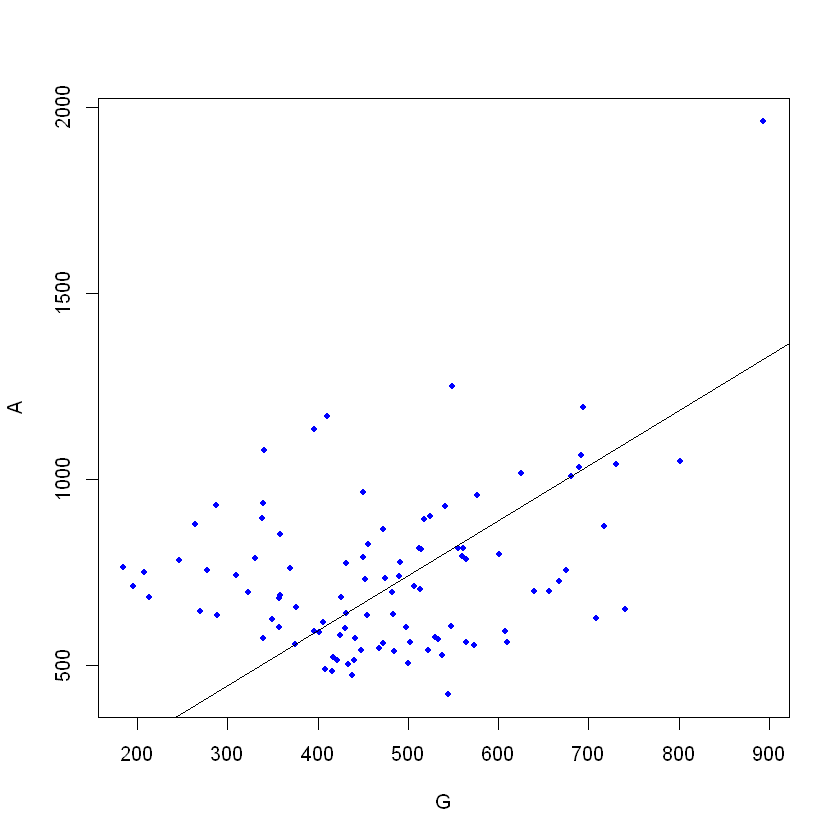

In [159]:
plot(data$G, data$A, pch=20,col="blue", xlab="G",ylab="A")
abline(lm(A ~ G+0,data))

Noting r2 and p values for original model through origin

In [190]:
model_origin <- lm(A ~ G+0,data)
summary_table[6,] <- c("Origin Model",glance(model_origin)$r.squared,glance(model_origin)$p.value)
head(summary_table)

Model,R_sqaured,p_Value
LinearModel,0.10823050447434,0.000831716923854345
Wayne Gretzky Model,0.10823050447434,0.000831716923854359
Wayne Gretzky Model Origin,0.970653958204801,1.12996626811667e-77
Patrick Kane Model,0.10823050447434,0.000831716923854363
Patrick Kane Model Origin,0.579980304611218,2.34480030357911e-20
Origin Model,0.89818610880756,6.49089821934292e-51
